In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic_train_set.csv")

In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
hayatta_kalanlar=len(df[df["Survived"]==1])
toplam_yolcu_sayısı = len(df)
print("Hayatta kalan yolcu sayısı =",hayatta_kalanlar)
print("Bütün yolcuların toplam sayısı =",toplam_yolcu_sayısı)

Hayatta kalan yolcu sayısı = 342
Bütün yolcuların toplam sayısı = 891


In [88]:
tüm_kadınlar = df[(df["Sex"]=="female")]
hayatta_kalan_kadınlar = df[(df["Sex"]=="female") & (df["Survived"]==1)]
tüm_erkekler = df[(df["Sex"]=="male")]
hayatta_kalan_erkekler = df[(df["Sex"]=="male") & (df["Survived"]==1)]
print("Kadınların hayatta kalma oranı =",len(hayatta_kalan_kadınlar)/len(tüm_kadınlar))
print("Erkeklerin hayatta kalma oranı =",len(hayatta_kalan_erkekler)/len(tüm_erkekler))

Kadınların hayatta kalma oranı = 0.7420382165605095
Erkeklerin hayatta kalma oranı = 0.18890814558058924


In [89]:
toplam_ucret = df["Fare"].sum()
print("Tüm yolcuların ödediği toplam ücret:",toplam_ucret)

Tüm yolcuların ödediği toplam ücret: 28693.9493


In [90]:
df.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [91]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
ortalama_yas = df["Age"].mean()
df["Age"] = df["Age"].fillna(ortalama_yas)
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [93]:
birinci_sinif = df.groupby("Pclass")["Survived"].mean().loc[1]
ikinci_sinif = df.groupby("Pclass")["Survived"].mean().loc[2]
ücüncü_sinif = df.groupby("Pclass")["Survived"].mean().loc[3]
print("1. sınıf bileti olanların yaşama oranı:",birinci_sinif)
print("2. sınıf bileti olanların yaşama oranı:",ikinci_sinif)
print("3. sınıf bileti olanların yaşama oranı:",ücüncü_sinif)
sinifa_gore = df.groupby("Pclass")["Survived"].mean()

1. sınıf bileti olanların yaşama oranı: 0.6296296296296297
2. sınıf bileti olanların yaşama oranı: 0.47282608695652173
3. sınıf bileti olanların yaşama oranı: 0.24236252545824846


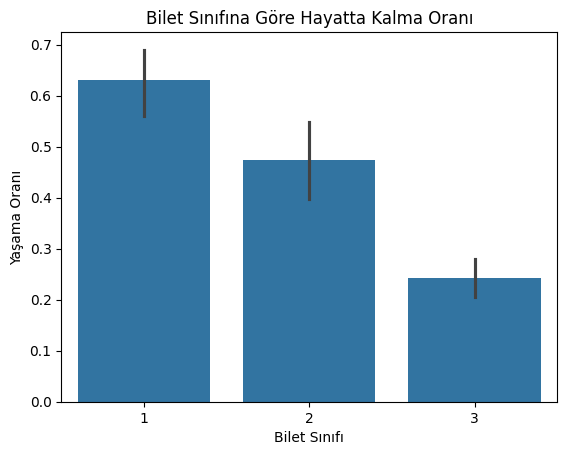

In [94]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Bilet Sınıfına Göre Hayatta Kalma Oranı")
plt.xlabel("Bilet Sınıfı")
plt.ylabel("Yaşama Oranı")
plt.show()

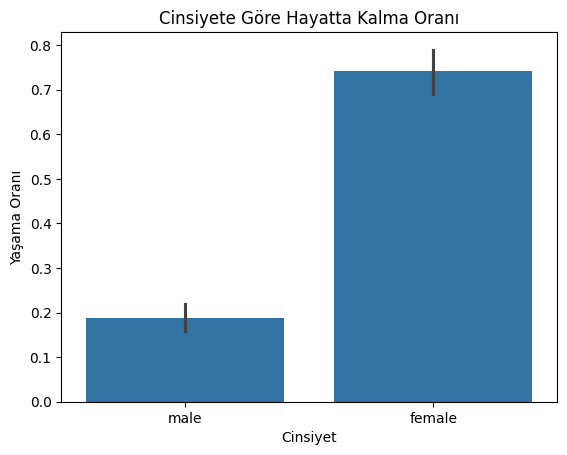

In [95]:
sns.barplot(data=df, x="Sex", y="Survived")
plt.title("Cinsiyete Göre Hayatta Kalma Oranı")
plt.xlabel("Cinsiyet")
plt.ylabel("Yaşama Oranı")
plt.show()